# 워드클라우드 만들어보기

크롤링 결과 중 해시태그 데이터 불러오기

In [13]:
import pandas as pd
raw_total = pd.read_excel("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Instagram_Crawling\\Insta_Sadang.xlsx")
raw_total['tags']

In [15]:
raw_total.head()

,Unnamed: 0,content,data,like,place,tags
0,0,#당산오돌한번 꽂힌 이후로 주기적으로 ᄀ...,2020-05-26,0,사당역,"['#당산오돌한번', '#사당맛집', '#사당..."
1,1,사당역 최애 맛집 고을래이베리코흑돼지!.내가 제일 자주가는 이베리코흑돼지맛집!고기집...,2020-06-02,0,사당역,"['#사당역맛집', '#사당맛집', '#사당회식장소', '#사당고기집', '#사당모..."
2,2,..취향저격 맛집 👊이수에서~ 사당까지!내 이...,2020-06-04,0,NaN,"['#사당맛집', '#사당족발', '#사당역맛..."
3,3,교대 맛있는 술집 추천~ 레트로한 감성과 맛깔난 안주가 이집만의 매력이다. 😌그 시...,2020-06-16,0,NaN,"['#교대맛집', '#교대맛집추천', '#교대술집', '#서초동맛집', '#서초동술..."
4,4,..사당 맛집 탐구생활 🔍사당~이수에서 먹어볼만한맛집들 모았다 📌@@이...,2020-05-26,0,사당 어딘가,"['#사당맛집', '#사당족발', '#사당역맛..."


In [16]:
raw_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   content     1000 non-null   object
 2   data        999 non-null    object
 3   like        1000 non-null   int64 
 4   place       341 non-null    object
 5   tags        1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [2]:
#해시태그 통합저장
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [3]:
tags_total[:10]

['#당산오돌한번',
 '#사당맛집',
 '#사당역맛집',
 '#사당고기집',
 '#사당맛집추천',
 '#사당역맛집',
 '#사당맛집',
 '#사당회식장소',
 '#사당고기집',
 '#사당모임']

In [4]:
#빈도수 집계
from collections import Counter
tags_counts = Counter(tags_total)

In [5]:
tags_counts.most_common(30) #가장 많이 사용된 상위 10개의 해시태그
#사당맛집이라는 해시태그가 가장 많이 사용됨을 알 수 있다.

[('#사당맛집', 628),
 ('#사당역맛집', 397),
 ('#이수맛집', 365),
 ('#이수역맛집', 360),
 ('#사당술집', 331),
 ('#방배동맛집', 324),
 ('#서초맛집', 313),
 ('#사당회식장소', 310),
 ('#서초구맛집', 308),
 ('#사당역술집', 305),
 ('#동작구맛집', 305),
 ('#맛집스타그램', 304),
 ('#족발맛집', 302),
 ('#사당족발', 296),
 ('#사당역족발', 294),
 ('#사당맛집100족발', 292),
 ('#100족발..', 179),
 ('#사당맛집', 134),
 ('', 132),
 ('#사당', 93),
 ('#먹스타그램', 80),
 ('#맛스타그램', 78),
 ('#100족발', 76),
 ('#사당역', 51),
 ('#맛스타그램', 50),
 ('#먹스타그램', 47),
 ('#방배맛집', 46),
 ('#이수맛집', 42),
 ('#일상', 37),
 ('#사당', 34)]

In [6]:
#위치정보가 저장되어 있는 데이터 빈도수 집계
#위치정보 기입은 선택사항이기 때문에 데이터가 많지 않음. (1,000개 게시물 중 135개 뿐..)
raw_total['place'].value_counts()

사당역           45
사당 어딘가        26
이수역           17
파니모들           8
카페 오다가다        8
              ..
리에또            1
이수회관           1
사조회참치 사당역점     1
구미지산동          1
신대방역           1
Name: place, Length: 135, dtype: int64

In [7]:
pd.DataFrame(raw_total['place'].value_counts())

,place
사당역,45
사당 어딘가,26
이수역,17
파니모들,8
카페 오다가다,8
...,...
리에또,1
이수회관,1
사조회참치 사당역점,1
구미지산동,1


In [21]:
#막대차트 그려보기
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform in ['darwin']:
    font_name = 'AppleGothic'
    
rc('font', family = font_name)

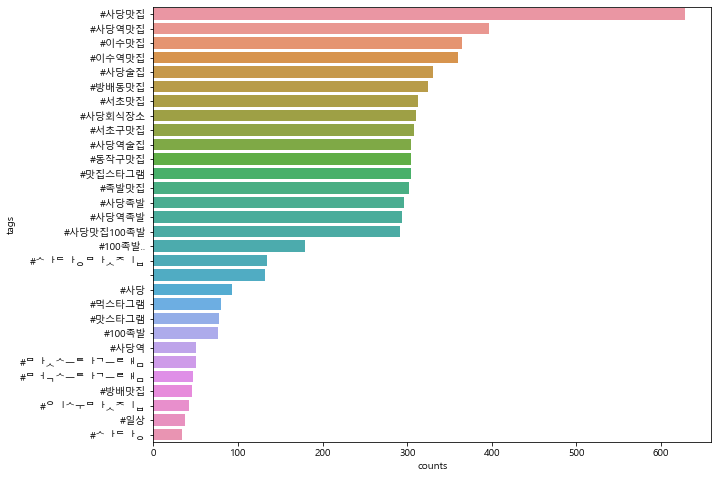

In [22]:
tag_counts_df = pd.DataFrame(tags_counts.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

plt.figure(figsize = (10, 8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

In [23]:
#워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = 'c:\\windows\\Fonts\\malgun.ttf'

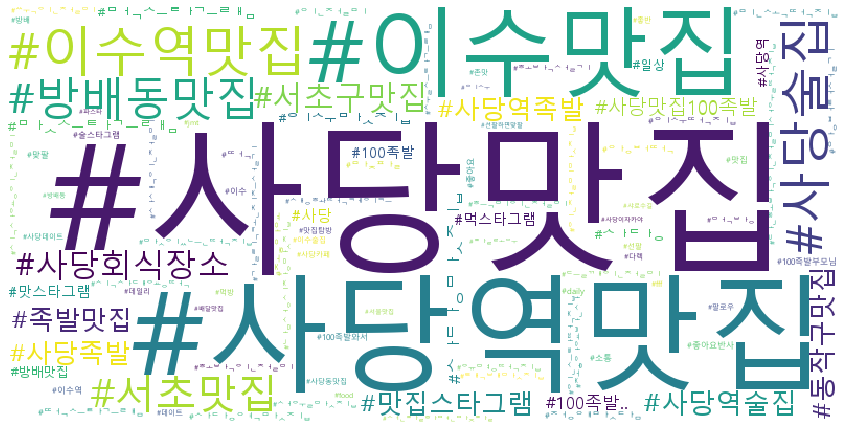

In [24]:
wordcloud = WordCloud(font_path = font_path,
                     background_color = 'white',
                     max_words = 100,
                     relative_scaling = 0.3,
                     width = 800,
                     height = 400,).generate_from_frequencies(tags_counts)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Insta_Sadang_WordCloud.png")